In [2]:
import cv2
import glob
from skimage.transform import resize
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [3]:
bears = []
import os
for dirname, _, filenames in os.walk('data/black_bear'):
    for filename in filenames:
        bears.append(os.path.join(dirname, filename))

elks = []
for dirname, _, filenames in os.walk('data/elk'):
    for filename in filenames:
        elks.append(os.path.join(dirname, filename))

In [4]:
from tqdm.auto import tqdm
import time

In [6]:
from skimage.color import rgb2gray
IMAGE_DIMS = (224, 224, 3)
x=[]
y=[]
e_count = 0
for i in tqdm(range(len(bears))):
    a = bears[i]
    try:
          counter = 0
          img=cv2.imread(a)
        
          img=cv2.resize(img, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          cv2.imwrite("data/gray_black_bear/bear {0}.jpg".format(i),img)
          x.append(img)
          y.append(1)
            
    except Exception as e:
          counter = 1
          e_count = e_count + 1

  0%|          | 0/718 [00:00<?, ?it/s]

In [7]:
pd.DataFrame(y).value_counts()

1    712
dtype: int64

In [8]:
for j in tqdm(range(len(elks))):
  a = elks[j]
  try:
        counter = 0
        img=cv2.imread(a)
        
        img=cv2.resize(img, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite("data/gray_elk/elk {0}.jpg".format(j),img)
        x.append(img)
        y.append(0)
            
  except Exception as e:
        counter = 1
        e_count = e_count + 1


  0%|          | 0/660 [00:00<?, ?it/s]

In [9]:
x, y = np.asarray(x), np.asarray(y)
print('x shape: ', x.shape, 'y shape: ', y.shape)

x shape:  (1372, 224, 224) y shape:  (1372,)


In [10]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X_test):
        y_pred = [self._get_single_prediction(x_test_row) for x_test_row in X_test]
        return np.array(y_pred)
    def _get_single_prediction(self, x_test_row):
        distances = [self._get_euclidean_distance(x_test_row, x_train_row) 
                     for x_train_row in self.X_train]
        k_idx = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[idx] for idx in k_idx]
        return np.argmax(np.bincount(k_labels))
    def _get_euclidean_distance(self, x1, x2):
        sum_squared_distance = np.sum((x1 - x2)**2)
        return np.sqrt(sum_squared_distance)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1,stratify =y)

In [12]:
ks = []
acc = []
for a in tqdm(range(1,20,2)):
    clf = KNN(a)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    for i in prediction:
        print(i, end= ' ')
    acc.append((prediction == y_test).sum() / len(y_test))
    ks.append(a)

  0%|          | 0/10 [00:00<?, ?it/s]

0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 

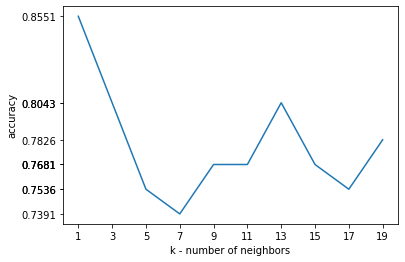

In [13]:
plt.plot(ks, acc)
plt.xticks(ks)
plt.yticks(acc)
plt.xlabel("k - number of neighbors")
plt.ylabel("accuracy")
plt.show()